In [1]:
#Import modules used for various functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
class logisticRegression:
        
    def __init__(self, x, y, tx, ty):      
        self.x = (np.insert(x, 0, 1, axis=1)).T
        self.y = y
        self.theta = (np.zeros(((self.x).shape[0], 1)))
        self.tx = (np.insert(tx, 0, 1, axis=1)).T
        self.ty = ty
         
    #To compute sigmoid
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
     
    #To calculate the cost function (J(theta))
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    #To optimise the value of theta using Gradient Descent Algorithm
    def gradient_descent(self, lr, iterations):
        cost=[]
        
        for i in range(iterations):
            
            #Hypothesis funcn is sigmoid applied to linear model 
            linear_model = np.dot((self.x).T, self.theta)
            h = self.sigmoid(linear_model)
            
            #To calculate cost
            cost.append(self.loss(h, self.y))
        
            #To calculate gradient and new value of theta
            d_theta = (1/(self.x).shape[1]) * np.dot(self.x,(h - self.y))
            self.theta -= (lr) * d_theta
        
        print("Weight parameters for model: \n", self.theta)
        return cost
     
    #Making the model using the final value of the parameters and displaying the final value
    def predict(self, x, theta):
        
        linear_model = np.dot(x.T, theta)
        model = self.sigmoid(linear_model)
        
        predicted=[]
        for i in range(x.shape[1]):
            if model[i]>= 0.5:
                predicted.append(1)
            else:
                predicted.append(0)
        return predicted
    
    #Calculating TP, TN, FP, FN and finding accuracy
    def accuracy(self, predicted, expected):
        TP= TN= FP= FN = 0
        for i in range(expected.shape[0]):
            if predicted[i]== 1:
                if expected[i] == 1:
                    TP+=1
                else:
                    FP+=1
            else:
                if expected[i] == 0:
                    TN+=1
                else:
                    FN+=1
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        return accuracy

In [3]:
class dataPrepare(logisticRegression):
    
    #Prepare the data set values:
    def __init__(self, train, test):
        
        #Features(x) and Target(y) from training data set
        x = np.array(train[['x_1', 'x_2']], dtype=float)
        y = np.array(train[['y']], dtype=float)
        
        #Features(tx) and Target(ty) from test data set
        tx = np.array(test[['x_1', 'x_2']], dtype=float)
        ty = np.array(test[['y']], dtype=float)
        
        super().__init__(x, y, tx, ty)
    
    def plot_loss(self, J, nofIterations):
        
        iterations = np.arange(nofIterations)
        plt.plot(iterations, J)
        plt.title("Training set loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss function")
        plt.show()
    
    def plot_data(self, x, y):
        
        plt.xlabel('x_1')
        plt.ylabel('x_2')
        for i in range(x.shape[1]):
            if y[i] == 1:
                plt.plot(x[1,i], x[2,i], 'gX')
            else:
                plt.plot(x[1,i], x[2,i], 'mD')
        plt.show()
        
    def callFunctions(self):
        
        #Finding loss during GDA method and plotting it
        J = self.gradient_descent(0.001, 100000)
        self.plot_loss(J, 100000)
        
        trainingAccuracy = self.accuracy((self.predict(self.x, self.theta)), self.y)
        print('Accuracy of model over training set = ', trainingAccuracy*100,"%")
        
        print("Actual output")
        self.plot_data(self.tx, self.ty)
        
        predicted = self.predict(self.tx, self.theta)
        print("Output predicted by model")
        self.plot_data(self.tx, predicted)
        
        testAccuracy = self.accuracy(predicted, self.ty)
        print('Accuracy of model over test set = ', testAccuracy*100,"%")

Weight parameters for model: 
 [[-3.36892256]
 [ 1.5563827 ]
 [-0.0248754 ]]


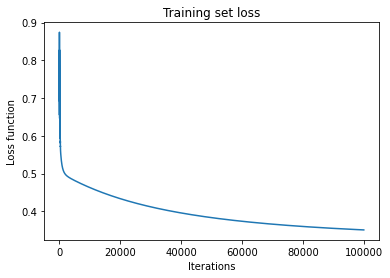

Accuracy of model over training set =  89.25 %
Actual output


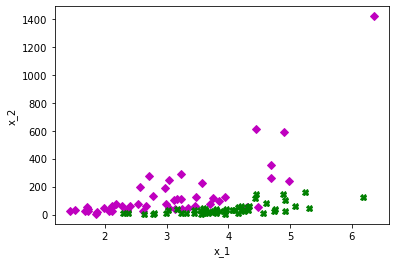

Output predicted by model


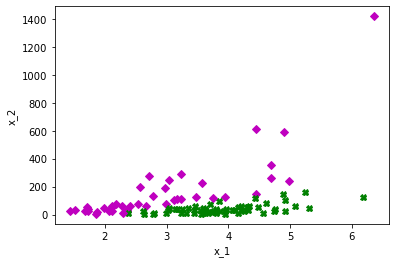

Accuracy of model over test set =  88.0 %


In [4]:
#DATA SET 1

train1 = pd.read_csv("ds1_train.csv")
test1 = pd.read_csv("ds1_test.csv")

lr1 = dataPrepare(train1, test1)
lr1.callFunctions()

Weight parameters for model: 
 [[ 0.69136559]
 [ 3.10857107]
 [-2.93497355]]


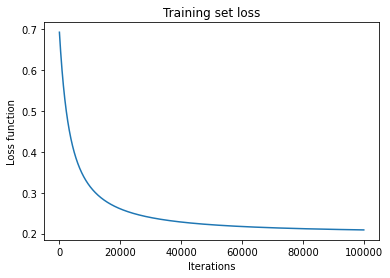

Accuracy of model over training set =  91.0 %
Actual output


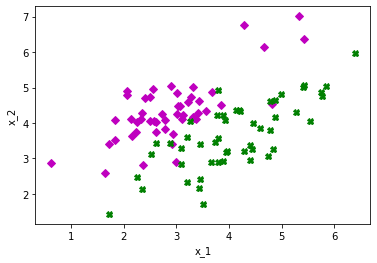

Output predicted by model


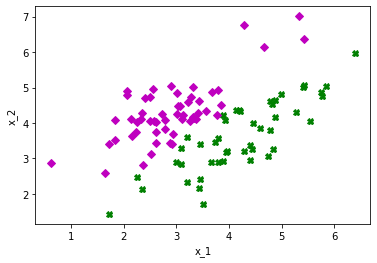

Accuracy of model over test set =  92.0 %


In [5]:
#DATA SET 2

train2 = pd.read_csv("ds2_train.csv")
test2 = pd.read_csv("ds2_test.csv")

lr2 = dataPrepare(train2, test2)
lr2.callFunctions()